In [ ]:
import gc
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['font.serif'] = ['SimHei']
%matplotlib inline 
sns.set_style("darkgrid",{"font.sans-serif":['SimHei','Droid Sans Fallback']}) # 解决负号问题
sns.set(font='SimHei')

In [ ]:
data = pd.read_csv("../data/brandInfo.csv")
# data = data.drop(columns=["Unnamed: 0","Unnamed: 0.1"])
# data.head()
# data.describe()
# data.info()

In [ ]:
# matplotlib中文字体
from matplotlib.font_manager import fontManager
import os
 
fonts = [font.name for font in fontManager.ttflist if 
         os.path.exists(font.fname) and os.stat(font.fname).st_size>1e6] 
 
for font in fonts:
    print(font)

In [ ]:
# 箱型图 （效果不好）
fig = plt.figure()  # 创建画布
ax = plt.subplot()  # 创建作图区域
# 缺口表示50%分位点的置信区间，缺口太大表示分布太分散了

projectNum = data.loc[:,'项目数']
homepageNum = data.loc[:,'首页收录']
qualityNum = data.loc[:,'项目品质']
attentionNum = data.loc[:,'关注度']
imgNum = data.loc[:,'项目图片数量']
ax.boxplot([projectNum, homepageNum, qualityNum, attentionNum, imgNum], notch=True)
# 修改x轴下标
ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xticklabels(['项目数', '首页收录', '项目品质', '关注度', '项目图片数量'])

plt.grid(axis='y') # 显示y坐标轴的底线
plt.show()

In [ ]:
# 小提琴图（不要）
sns.set_style('whitegrid')
sns.set_context('paper')
# sns.violinplot(data=data.iloc[:,2:6],scale="width", palette="PuBuGn")
sns.violinplot(data=data.loc[:,['项目图片数量']],palette="PuBuGn")

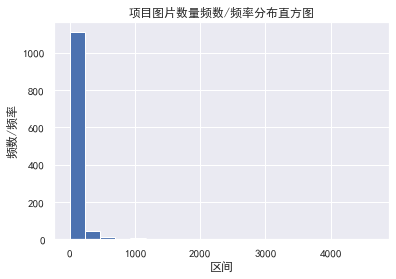

In [24]:
# 柱状图
projectNum = data.loc[:,'项目数']
homepageNum = data.loc[:,'首页收录']
qualityNum = data.loc[:,'项目品质']
attentionNum = data.loc[:,'关注度']
imgNum = data.loc[:,'项目图片数量']

import matplotlib.pyplot as plt
plt.hist(imgNum, bins=20)

plt.title("项目图片数量频数/频率分布直方图")
plt.xlabel("区间")
# 显示纵轴标签
plt.ylabel("频数/频率")
plt.show()

In [ ]:
# 相关性矩阵
data = pd.read_csv("../data/deleteMissing.csv")
fig = sns.pairplot(data=data.loc[:,['项目数', '首页收录', '项目品质', '关注度', '项目图片数量']],palette="PuBuGn",kind="reg",diag_kind="kde")
fig.savefig('hist.jpg') # 保存图片

In [ ]:
# 缺失值分布图
import sys
sys.path.append('/opt/miniconda3/lib/python3.7/site-packages')
import missingno as msno
data = pd.read_csv("../data/missingValue.csv")
msno.matrix(data, labels=True)   # 矩阵图 


In [ ]:
# 去除缺失数据，再次绘制相关性矩阵
data = pd.read_csv("../data/brandInfo.csv")
newdata = data
for i in range(1179,0,-1):
    if (data.iloc[i,6]==0):
        newdata = newdata.drop(index=[i])
newdata
newdata.to_csv('../data/test.csv',encoding='utf-8')